<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220916_House_Price_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/12/29/house-price-prediction-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

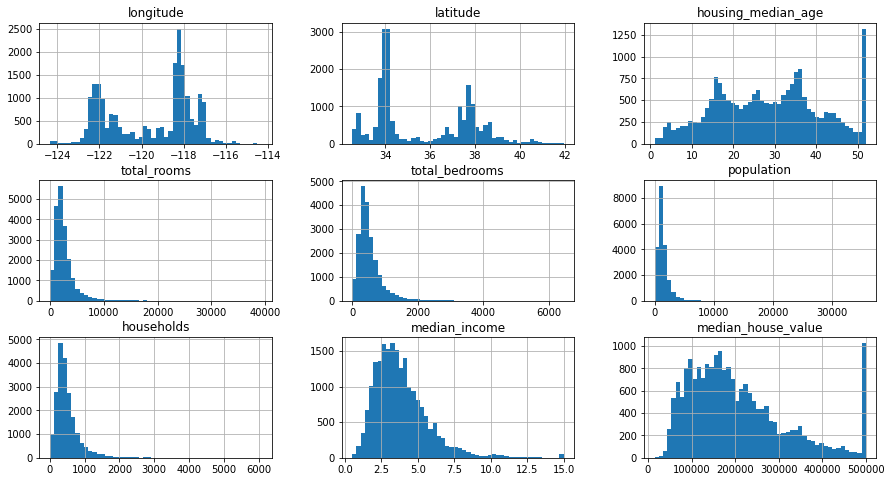

In [6]:
data.hist(bins=50,figsize=(15,8))
plt.show()

In [7]:
train_set, test_set = train_test_split(data, test_size=0.2)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

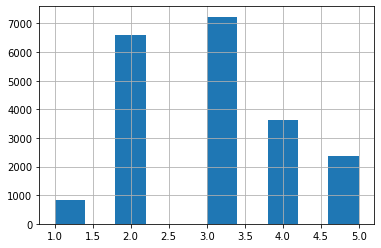

In [8]:
data['income_cat'] = pd.cut(data['median_income'], bins=[0.,1.5,3.0,4.5,6.0, np.inf], labels=[1,2,3,4,5])
data['income_cat'].hist()
plt.show()

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
split

StratifiedShuffleSplit(n_splits=1, random_state=None, test_size=0.2,
            train_size=None)

In [ ]:
help(split)

In [14]:
for train_index, test_index in split.split(data, data['income_cat']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [15]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)
housing = strat_train_set.copy()

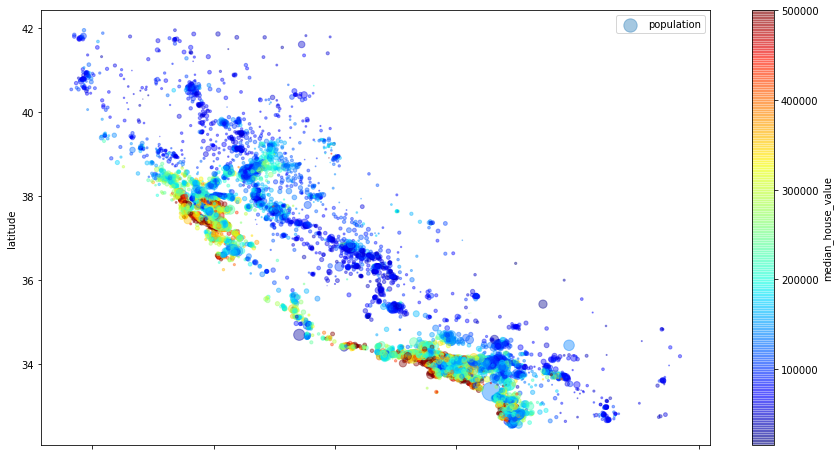

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', 
             figsize=(15,8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [19]:
corr_matrix = housing.corr()

In [21]:
corr_matrix.median_house_value.sort_values(ascending=False)[1:]

median_income         0.690822
total_rooms           0.128754
housing_median_age    0.101909
households            0.059578
total_bedrooms        0.043941
population           -0.029412
longitude            -0.042287
latitude             -0.146910
Name: median_house_value, dtype: float64

<Figure size 1296x576 with 0 Axes>

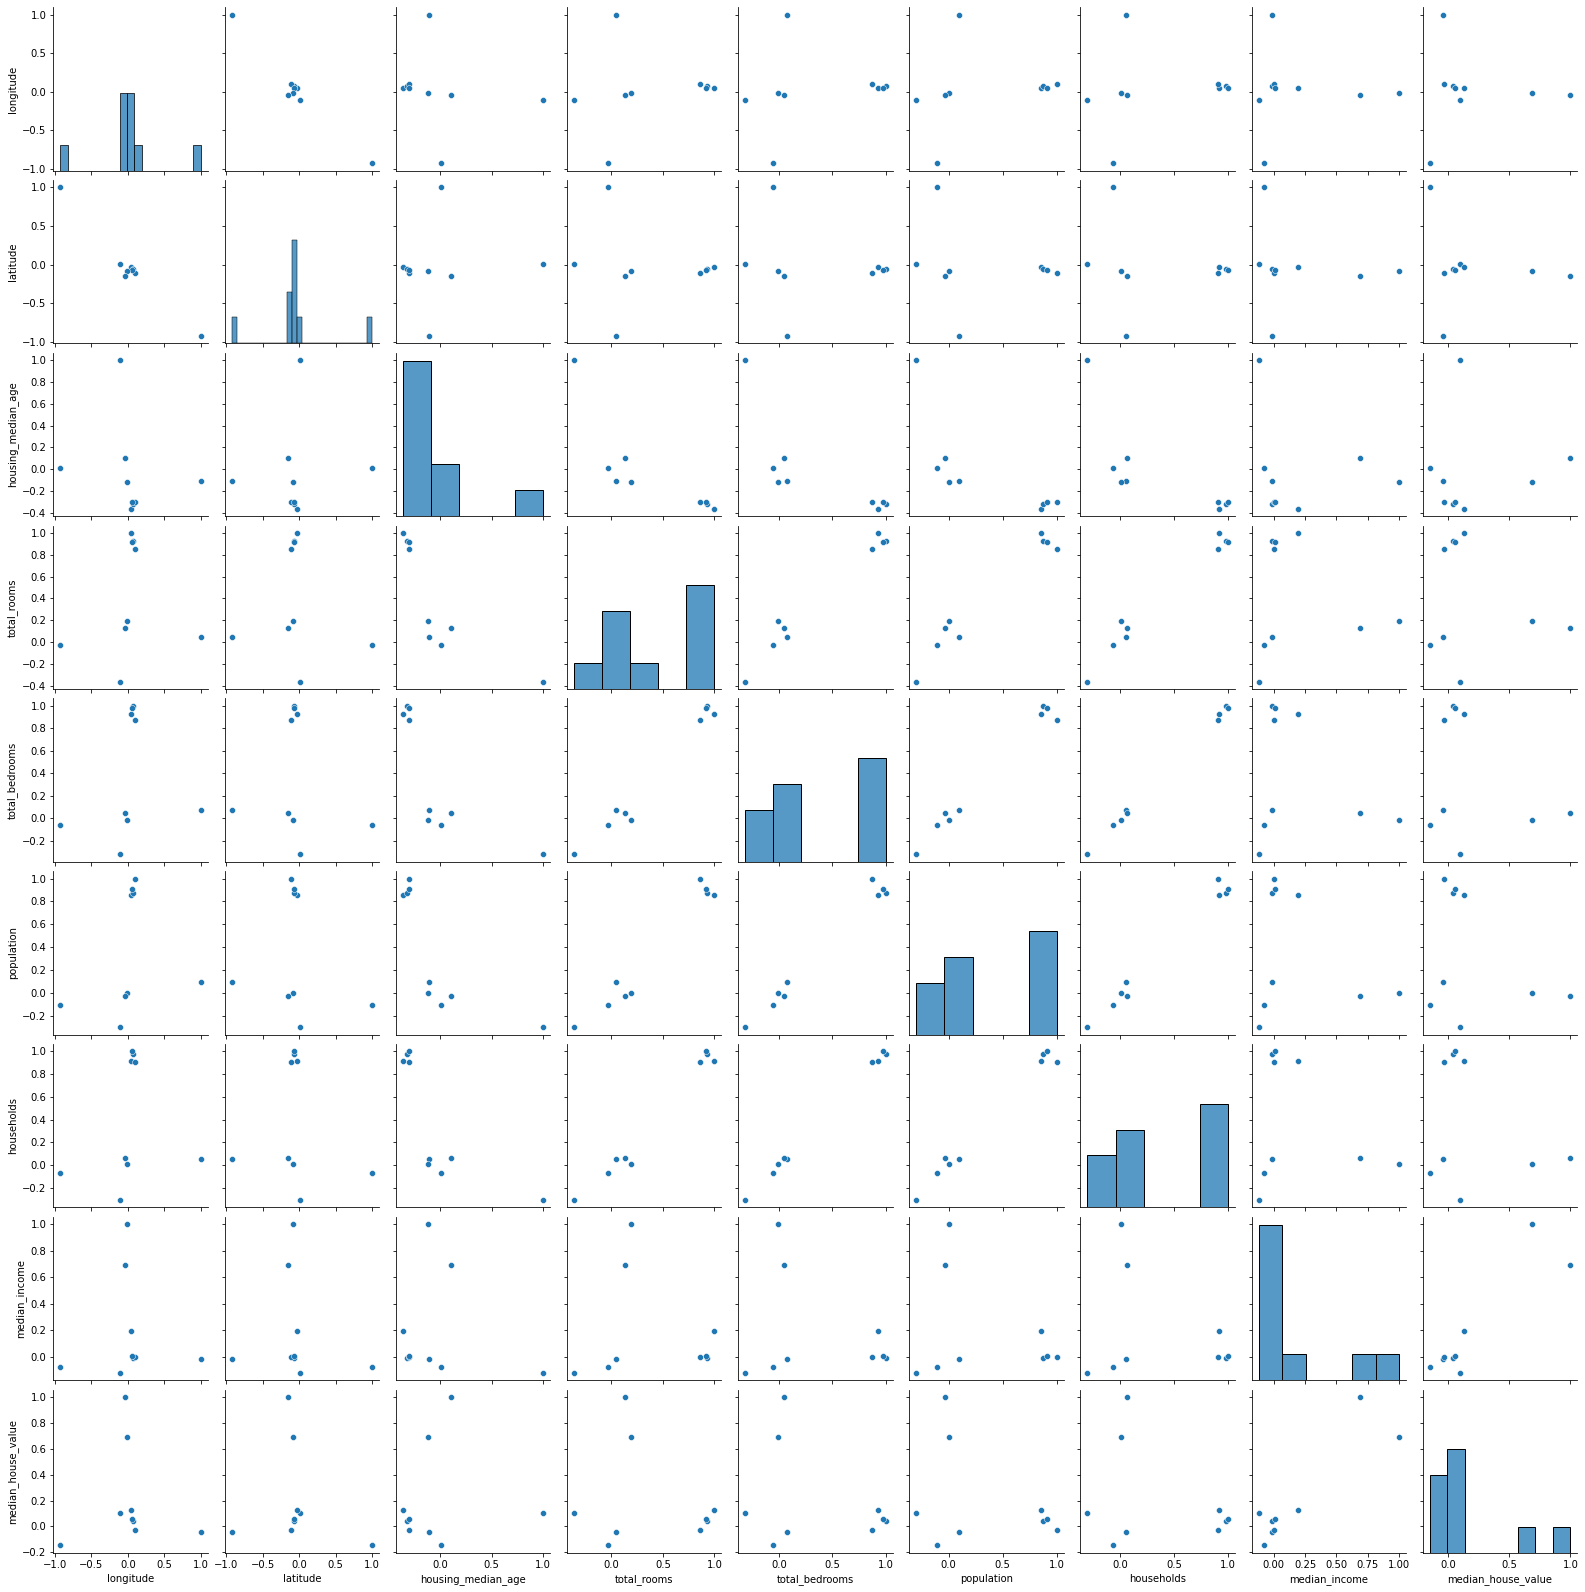

In [26]:
plt.figure(figsize=(18,8))
sns.pairplot(corr_matrix)
plt.show()

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14800 to 7404
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16355 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [28]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_bedrooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14800 to 7404
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16355 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16355 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [30]:
corr_matrix_2 = housing.corr()

In [32]:
corr_matrix_2.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690822
rooms_per_household         0.153580
total_rooms                 0.128754
housing_median_age          0.101909
households                  0.059578
total_bedrooms              0.043941
population_per_household   -0.022283
population                 -0.029412
longitude                  -0.042287
latitude                   -0.146910
bedrooms_per_room                NaN
Name: median_house_value, dtype: float64

In [33]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [34]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [36]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [37]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [41]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [42]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [43]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
num_attribs = list(housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [45]:
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)])

In [46]:
housing_prepared = full_pipeline.fit_transform(housing)

In [47]:
housing_prepared

array([[ 1.23430311, -1.42882954, -0.84594949, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71964242, -0.69390835,  0.10966646, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22907279,  1.22063158,  0.26893579, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.17434264, -1.16201102, -1.96083476, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72940222,  1.68405322,  1.54309038, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68466548, -0.78752888,  0.82637842, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
model = LinearRegression()
model.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_preparation = full_pipeline.transform(data)
print('Predictions: ', model.predict(data_preparation))

Predictions:  [160830.38392564 132710.32836466 157727.97218966 125528.41135319
 243380.08161449]
